<a href="https://colab.research.google.com/github/jw13k/2024-1-my-DL/blob/main/inclass/OXCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##OX CNN

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import tensorflow as tf
import os
import PIL
import shutil

# 기본 경로
base_dir = './OX_images/'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

# 훈련용 O/X 이미지 경로
train_o_dir = os.path.join(train_dir, 'O')
train_x_dir = os.path.join(train_dir, 'X')
print(train_o_dir, train_x_dir)

#검증용 O/X 이미지 경로
validation_o_dir = os.path.join(validation_dir, 'O')
validation_x_dir = os.path.join(validation_dir, 'X')
print(validation_o_dir, validation_x_dir)

#테스트용 O/X 이미지 경로
test_o_dir = os.path.join(test_dir, 'O')
test_x_dir = os.path.join(test_dir, 'X')
print(test_o_dir, test_x_dir)

./OX_images/train/O ./OX_images/train/X
./OX_images/validation/O ./OX_images/validation/X
./OX_images/test/O ./OX_images/test/X


In [61]:
#훈련용 이미지 파일 이름 조회
train_o_fnames = os.listdir(train_o_dir)
train_x_fnames = os.listdir(train_x_dir)
print(train_o_fnames)
print(train_x_fnames)

['20223618-O1.png', '20220371 6.png', '20232502._3.png', '20231563_o5.png', '20223618-O20.png', '20223618-O3.png', '20231576O8.png', '20223618-O18.png', '55-1-o.png', '20231575_O_05.png', '20231559.o10.png', '20231559.o1.png', '20223618-O17.png', '20231567_O5.png', '55-3-o.png', '20221667-2.png', '1573_2.png', '20210829-O3.png', '20221667-3.png', '20220371 8.png', '20231559.o6.png', '20223618-O8.png', '1573_9.png', '20231567_O2.png', '20231566_o.png', '1562_o1.png', '20210829-O6.png', '20223618-O5.png', '20223618-O14.png', '20220371 7.png', '1562_o9.png', '1573_6.png', '55-4-o.png', '20220371 5.png', '20223618-O10.png', '20210829-O7.png', '1562_o5.png', '20223618-O9.png', '1562_o2.png', '1573_8.png', '20231576O4.png', '20232502._4.png', '20231575_O_02.png', '20231576O10.png', '20231567_O3.png', '20231563_o8.png', '20231568O5.png', '1562_o6.png', '20231559.o5.png', '20221667-1.png', '20223618-O7.png', '20231575_O_04.png', '2880_0.png', '20231576O6.png', '20223618-O13.png', '20210829-O9.

In [62]:
print('Total training o images :', len(os.listdir(train_o_dir)))
print('Total training x images :', len(os.listdir(train_x_dir)))

print('Total validation o images :', len(os.listdir(validation_o_dir)))
print('Total validation x images :', len(os.listdir(validation_x_dir)))

print('Total test o images :', len(os.listdir(test_o_dir)))
print('Total test x images :', len(os.listdir(test_x_dir)))

Total training o images : 140
Total training x images : 140
Total validation o images : 20
Total validation x images : 20
Total test o images : 20
Total test x images : 20


<function matplotlib.pyplot.show(close=None, block=None)>

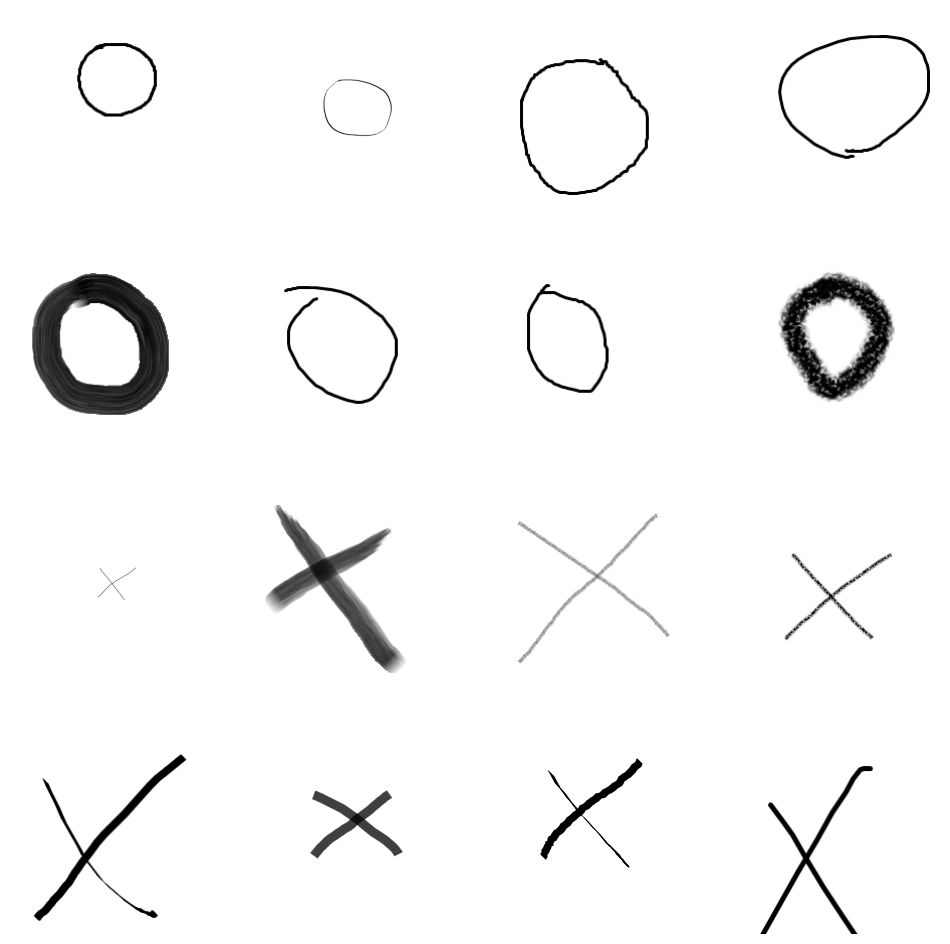

In [63]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows, ncols = 4, 4
pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols * 3, nrows * 3)

pic_index += 8

next_o_pix = [os.path.join(train_o_dir, fname) for fname in train_o_fnames[pic_index-8:pic_index]]
next_x_pix = [os.path.join(train_x_dir, fname) for fname in train_x_fnames[pic_index-8:pic_index]]

for i, img_path in enumerate(next_o_pix + next_x_pix):
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off')

    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show

In [64]:
#이미지 데이터 전처리
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Image augmentation
# train 셋에만 적용
train_datagen = ImageDataGenerator(rescale = 1./255, # 모든 이미지 원소값들을 255로 나누기
                                   rotation_range=25, # 0~25도 사이에서 임의의 각도로 원본이미지를 회전
                                   width_shift_range=0.05, # 0.05범위 내에서 임의의 값만큼 임의의 방향으로 좌우 이동
                                   height_shift_range=0.05, # 0.05범위 내에서 임의의 값만큼 임의의 방향으로 상하 이동
                                   zoom_range=0.2, # (1-0.2)~(1+0.2) => 0.8~1.2 사이에서 임의의 수치만큼 확대/축소
                                   horizontal_flip=True, # 좌우로 뒤집기
                                   fill_mode='nearest')

# validation 및 test 이미지는 augmentation을 적용하지 않는다;
# 모델 성능을 평가할 때에는 이미지 원본을 사용 (rescale만 진행)
validation_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [65]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=16,
                                                    color_mode='grayscale',
                                                    class_mode='binary',
                                                    target_size=(150, 150))
validation_generator = validation_datagen.flow_from_directory(validation_dir,
                                                            batch_size=4,
                                                            color_mode='grayscale',
                                                            class_mode='binary',
                                                            target_size=(150, 150))
test_generator = test_datagen.flow_from_directory(test_dir,
                                            batch_size=4,
                                            color_mode='grayscale',
                                            class_mode='binary',
                                            target_size=(150, 150))


Found 280 images belonging to 3 classes.
Found 40 images belonging to 3 classes.
Found 40 images belonging to 3 classes.


In [66]:
import os

folder_path = './OX_image/validation/.ipynb_checkpoints'

if os.path.exists(folder_path):
    shutil.rmtree(folder_path)
    print("폴더가 삭제되었습니다.")
else:
    print("폴더가 존재하지 않습니다.")

folder_path = './OX_image/train/.ipynb_checkpoints'

if os.path.exists(folder_path):
    shutil.rmtree(folder_path)
    print("폴더가 삭제되었습니다.")
else:
    print("폴더가 존재하지 않습니다.")

folder_path = './OX_image/test/.ipynb_checkpoints'

if os.path.exists(folder_path):
    shutil.rmtree(folder_path)
    print("폴더가 삭제되었습니다.")
else:
    print("폴더가 존재하지 않습니다.")

폴더가 존재하지 않습니다.
폴더가 존재하지 않습니다.
폴더가 존재하지 않습니다.


In [67]:
train_generator.class_indices

{'.ipynb_checkpoints': 0, 'O': 1, 'X': 2}

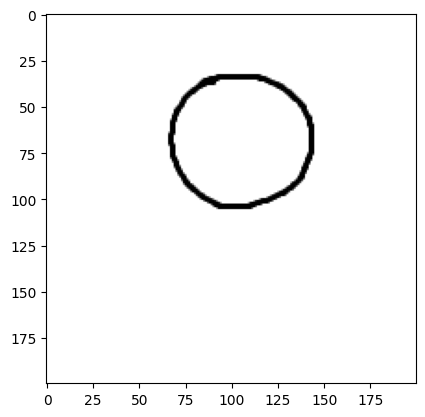

In [68]:
sample_img = mpimg.imread(next_o_pix[0])
plt.imshow(sample_img)
plt.show()

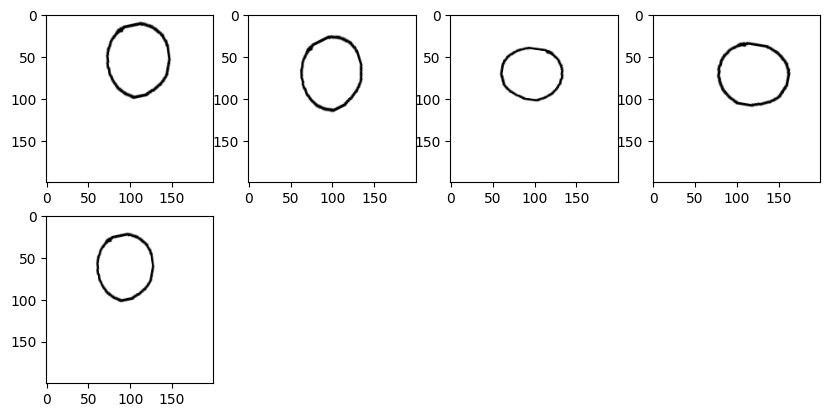

In [69]:
max_iter = 4
cnt = 1
sample_img2 = sample_img[np.newaxis, ...]

plt.figure(figsize=(10, 10))
for img in train_datagen.flow(sample_img2):
    plt.subplot(4, max_iter, cnt)
    plt.imshow(image.array_to_img(img[0]))
    if cnt > max_iter:
        break
    cnt += 1

In [70]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(150, 150, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 148, 148, 16)      160       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 74, 74, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 36, 36, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 34, 34, 32)        9248      
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 17, 17, 32)       

In [71]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [73]:
# 모델 훈련
history = model.fit_generator(train_generator, # train_generator안에 X값, y값 다 있으니 generator만 주면 된다
                              validation_data=validation_generator, # validatino_generator안에도 검증용 X,y데이터들이 다 있으니 generator로 주면 됨
                              steps_per_epoch=4, # 한 번의 에포크(epoch)에서 훈련에 사용할 배치(batch)의 개수 지정; generator를 4번 부르겠다
                              epochs=100, # 데이터셋을 한 번 훈련하는 과정; epoch은 100 이상은 줘야한다
                              validation_steps=4, # 한 번의 에포크가 끝날 때, 검증에 사용되는 배치(batch)의 개수를 지정;
                                                  # validation_generator를 4번 불러서 나온 이미지들로 작업을 해라
                              verbose=2)
# 참고: validation_steps는 보통 내가 원하는 이미지 수에 flow할 때 지정한 batchsize로 나눈 값을 validation_steps로 지정

<ipython-input-73-c83d59ad84b8>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator, # train_generator안에 X값, y값 다 있으니 generator만 주면 된다


Epoch 1/100
4/4 - 4s - loss: -6.9677e+01 - accuracy: 0.4375 - val_loss: -5.9433e+02 - val_accuracy: 0.2500 - 4s/epoch - 1s/step
Epoch 2/100
4/4 - 1s - loss: -1.2328e+03 - accuracy: 0.5156 - val_loss: -2.2842e+03 - val_accuracy: 0.6875 - 1s/epoch - 349ms/step
Epoch 3/100
4/4 - 1s - loss: -8.3280e+03 - accuracy: 0.3906 - val_loss: -1.2554e+04 - val_accuracy: 0.5625 - 1s/epoch - 364ms/step
Epoch 4/100
4/4 - 1s - loss: -2.7794e+04 - accuracy: 0.4062 - val_loss: -3.1345e+04 - val_accuracy: 0.6250 - 1s/epoch - 353ms/step
Epoch 5/100
4/4 - 2s - loss: -4.4012e+04 - accuracy: 0.5938 - val_loss: -7.2712e+04 - val_accuracy: 0.5625 - 2s/epoch - 382ms/step
Epoch 6/100
4/4 - 2s - loss: -1.2790e+05 - accuracy: 0.4375 - val_loss: -1.5100e+05 - val_accuracy: 0.5625 - 2s/epoch - 573ms/step
Epoch 7/100
4/4 - 2s - loss: -2.4038e+05 - accuracy: 0.4531 - val_loss: -2.7842e+05 - val_accuracy: 0.5625 - 2s/epoch - 520ms/step
Epoch 8/100
4/4 - 2s - loss: -3.9697e+05 - accuracy: 0.4844 - val_loss: -4.4513e+05 - 

In [74]:
model.evaluate(train_generator)

18/18 [==============================] - 2s 118ms/step - loss: -8707628032.0000 - accuracy: 0.5000


[-8707628032.0, 0.5]

In [75]:
model.evaluate(validation_generator)

10/10 [==============================] - 0s 38ms/step - loss: -8633407488.0000 - accuracy: 0.5000


[-8633407488.0, 0.5]

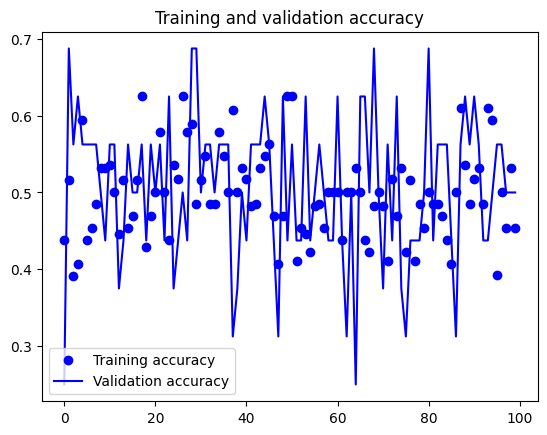

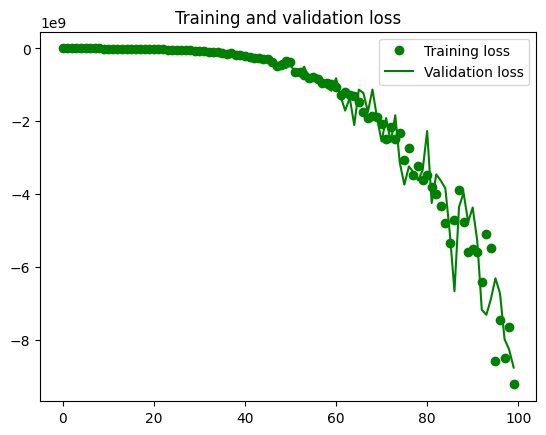

In [76]:
# 정확도 및 손실 시각화
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'go', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

1/1 [==============================] - 0s 124ms/step
1 20 1
1/1 [==============================] - 0s 28ms/step
1 20 2
1/1 [==============================] - 0s 33ms/step
1 20 3
1/1 [==============================] - 0s 25ms/step
1 20 4
1/1 [==============================] - 0s 28ms/step
1 20 5
1/1 [==============================] - 0s 29ms/step
1 20 6
1/1 [==============================] - 0s 38ms/step
1 20 7
1/1 [==============================] - 0s 44ms/step
1 20 8
1/1 [==============================] - 0s 40ms/step
1 20 9
1/1 [==============================] - 0s 37ms/step
1 20 10
1/1 [==============================] - 0s 54ms/step
1 20 11
1/1 [==============================] - 0s 38ms/step
1 20 12
1/1 [==============================] - 0s 40ms/step
1 20 13
1/1 [==============================] - 0s 50ms/step
1 20 14
1/1 [==============================] - 0s 36ms/step
1 20 15
1/1 [==============================] - 0s 38ms/step
1 20 16
1/1 [==============================] - 0s 38ms/s

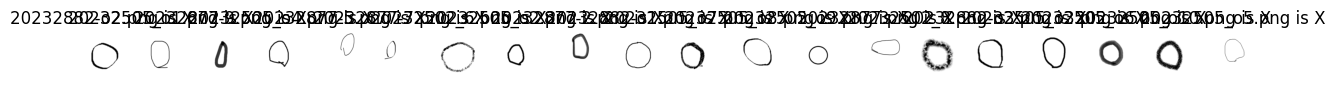

1/1 [==============================] - 0s 35ms/step
1 20 1
1/1 [==============================] - 0s 26ms/step
1 20 2
1/1 [==============================] - 0s 31ms/step
1 20 3
1/1 [==============================] - 0s 25ms/step
1 20 4
1/1 [==============================] - 0s 30ms/step
1 20 5
1/1 [==============================] - 0s 30ms/step
1 20 6
1/1 [==============================] - 0s 28ms/step
1 20 7
1/1 [==============================] - 0s 28ms/step
1 20 8
1/1 [==============================] - 0s 31ms/step
1 20 9
1/1 [==============================] - 0s 38ms/step
1 20 10
1/1 [==============================] - 0s 26ms/step
1 20 11
1/1 [==============================] - 0s 32ms/step
1 20 12
1/1 [==============================] - 0s 29ms/step
1 20 13
1/1 [==============================] - 0s 26ms/step
1 20 14
1/1 [==============================] - 0s 28ms/step
1 20 15
1/1 [==============================] - 0s 26ms/step
1 20 16
1/1 [==============================] - 0s 29ms/st

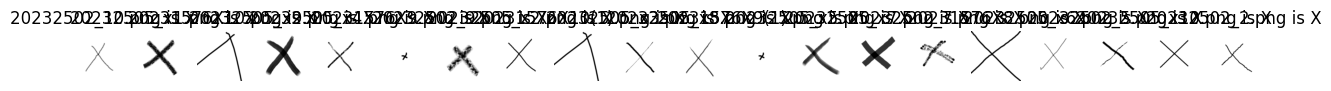

In [82]:
# 이제 테스트 이미지 분류
import numpy as np
from keras.preprocessing import image

# 테스트용 O 이미지 경로 설정
test_dir = './OX_images/test/'
test_o_dir = os.path.join(test_dir, 'O/')
test_o_filenames = os.listdir(test_o_dir)
test_o_filenames

# 테스트용 X 이미지 경로 설정
test_dir = './OX_images/test/'
test_x_dir = os.path.join(test_dir, 'X/')
test_x_filenames = os.listdir(test_x_dir)
test_x_filenames

# O,X를 key로, 이미지 파일 이름들을 value로 dictionary 생성
dic_ox_filenames = {}
dic_ox_filenames['O'] = test_o_filenames
dic_ox_filenames['X'] = test_x_filenames

# O/X 분류 테스트
for ox, filenames in dic_ox_filenames.items():
    fig = plt.figure(figsize=(16,20))
    rows, cols = 1, 20
    for i, fn in enumerate(filenames):
        path = test_dir + ox + '/' + fn
        test_img = image.load_img(path, color_mode='grayscale', target_size=(150, 150), interpolation='bilinear')
        x = image.img_to_array(test_img)
        x = np.expand_dims(x, axis=0)
        images = np.vstack([x])

        classes = model.predict(images, batch_size=10)
        print(rows, cols, i+1)
        fig.add_subplot(rows, cols+1, i+1)
        if classes[0]==0:
            plt.title(fn + " is O")
            plt.axis('off')
            plt.imshow(test_img, cmap='gray')
        else:
            plt.title(fn + " is X")
            plt.axis('off')
            plt.imshow(test_img, cmap='gray')
    plt.show();

In [83]:
model.evaluate(test_generator)

10/10 [==============================] - 0s 23ms/step - loss: -8707842048.0000 - accuracy: 0.5000


[-8707842048.0, 0.5]